In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [118]:

data = pd.read_csv('spam.csv')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 1.Data Cleaning

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [120]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [121]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [122]:
data.rename(columns={"v1":"target" , "v2":"text"},inplace=True)

In [123]:
data

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [124]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [125]:
data["target"]=encoder.fit_transform(data["target"])

In [126]:
data

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [127]:
data.isna().sum()

target    0
text      0
dtype: int64

In [128]:
data.duplicated().sum()

403

In [129]:
data=data.drop_duplicates(keep="first")

In [130]:
data.shape

(5169, 2)

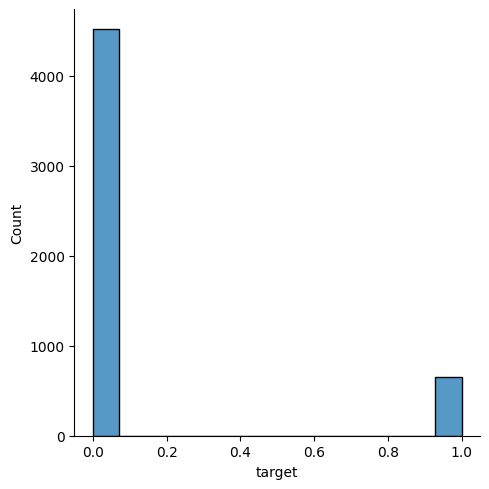

In [175]:
sns.displot(data["target"])
plt.show()

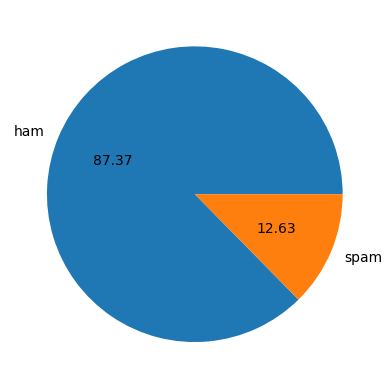

In [132]:
plt.pie(data["target"].value_counts(), labels=["ham","spam"], autopct= "%0.2f")
plt.show()

In [133]:
import nltk 


In [134]:
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [135]:
data["num_characters"] = data["text"].apply(len)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13780\3310457060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_characters"] = data["text"].apply(len)


In [136]:
data

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [137]:
data["num_words"] = data["text"].apply(lambda x :len(nltk.word_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_13780\3433885384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_words"] = data["text"].apply(lambda x :len(nltk.word_tokenize(x)))


In [138]:
data

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [139]:
data["num_sentences"] = data["text"].apply(lambda x :len(nltk.sent_tokenize(x)))

C:\Users\Admin\AppData\Local\Temp\ipykernel_13780\1540292295.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["num_sentences"] = data["text"].apply(lambda x :len(nltk.sent_tokenize(x)))


In [140]:
data

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [141]:
data[["num_characters","num_words","num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_words', ylabel='Count'>

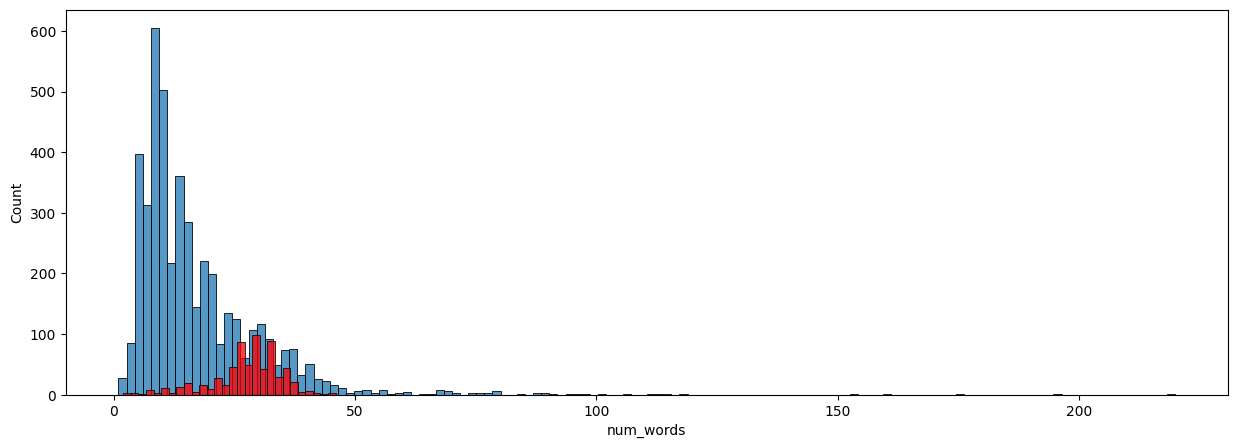

In [142]:
plt.figure(figsize=(15,5))
sns.histplot(data[data["target"] == 0]["num_words"])
sns.histplot(data[data["target"] == 1]["num_words"] , color = "red")

<Axes: xlabel='num_sentences', ylabel='Count'>

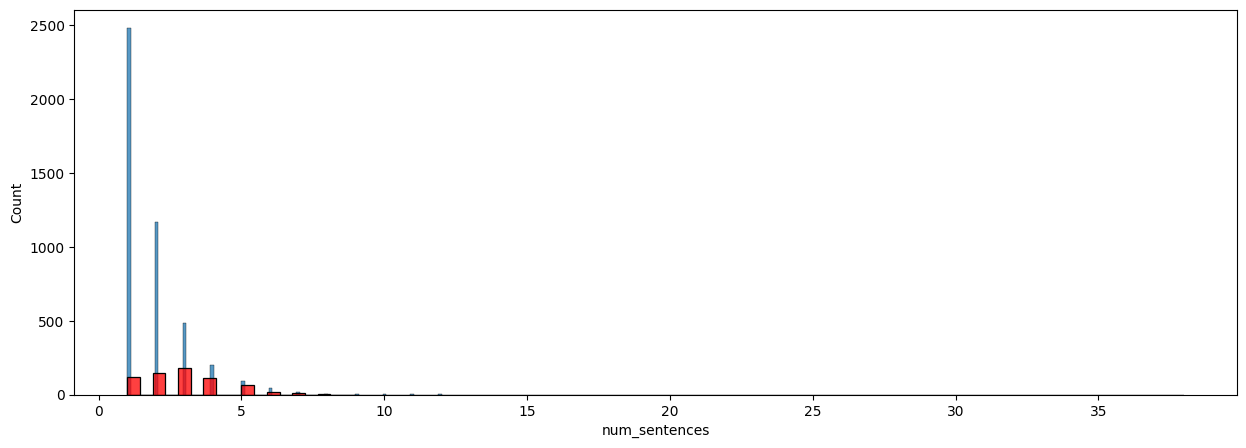

In [143]:
plt.figure(figsize=(15,5))
sns.histplot(data[data["target"] == 0]["num_sentences"])
sns.histplot(data[data["target"] == 1]["num_sentences"] , color = "red")

## 3. Data Preprocessing
  ## .Lower case
  ## .tokenizaion
  ## .Removing Special Characters
  ## . remove Stopwords and punctuation
  ## . Stemming


In [144]:
import nltk
import string
string.punctuation
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [145]:
from nltk.stem.porter import  PorterStemmer
ps = PorterStemmer()
ps.stem("loving")

'love'

In [146]:
def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y= [ ]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in  string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        

    return " ".join(y)
    


In [ ]:
data["transfrom_text"]=data["text"].apply(transform_text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_13780\3202976464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["transfrom_text"]=data["text"].apply(transform_text)


In [148]:
data

,target,text,num_characters,num_words,num_sentences,transfrom_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## 4. Model Building

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [150]:
x = cv.fit_transform(data["transfrom_text"]).toarray()


In [151]:
x.shape

(5169, 6677)

In [152]:
y = data["target"].values

In [153]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [154]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  =  train_test_split(x,y,random_state=42,test_size=0.2)

In [155]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [219]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [220]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8665377176015474
[[770 119]
 [ 19 126]]
0.5142857142857142


In [166]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9729206963249516
[[872  17]
 [ 11 134]]
0.8874172185430463


In [223]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [160]:
import pickle

In [224]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=6677 )
y_pred4 = bnb.predict(x_test)   # create vectorizer
tfidf.fit_transform(data["text"]).toarray()    # fit on training text
print(accuracy_score(y_test,y_pred4)*100)   
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4)*100)

96.61508704061895
[[885   4]
 [ 31 114]]
96.61016949152543


C:\Users\Admin\AppData\Local\Temp\ipykernel_13780\1702339862.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["target"] == 0]["num_characters"],kde=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13780\1702339862.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["targe

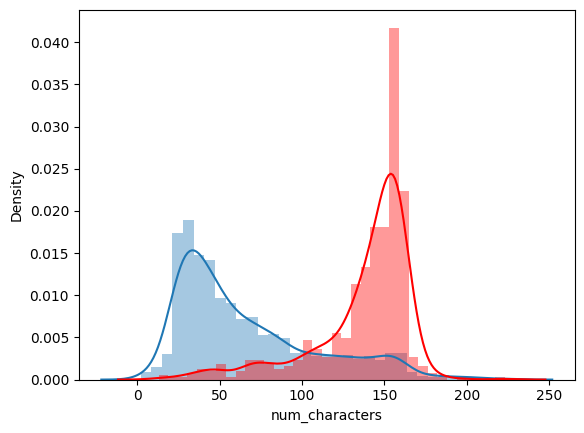

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [225]:
sns.distplot(data[data["target"] == 0]["num_characters"],kde=True)
sns.distplot(data[data["target"] == 1]["num_characters"] , color = "red",kde=True)   
plt.show()
plt.figure(figsize=(15,5))

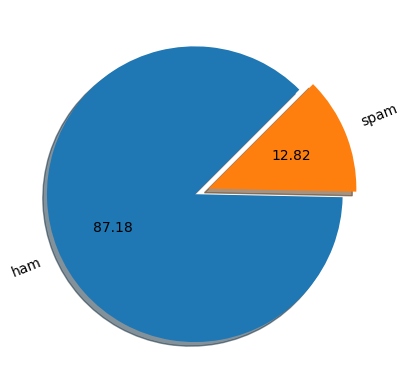

In [228]:
plt.pie(data["target"].value_counts(), labels=["ham","spam"], autopct= "%0.2f",shadow=True,explode=[0,0.1],startangle=45,rotatelabels=True)
plt.show()

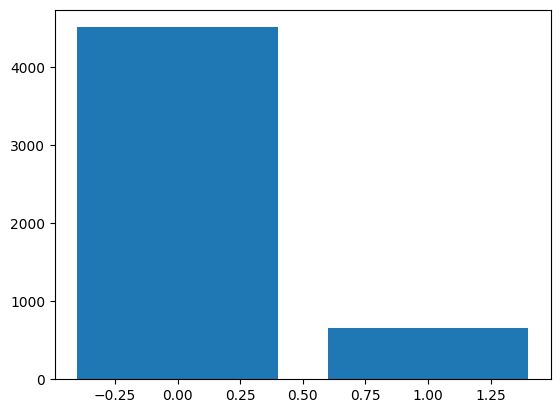

In [174]:
plt.bar(data["target"].value_counts().index , data["target"].value_counts().values)
plt.show()

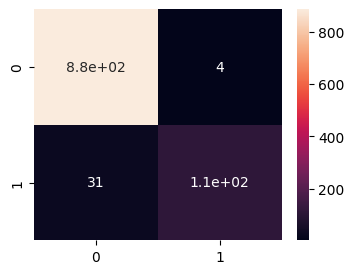

In [186]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True)
plt.show()

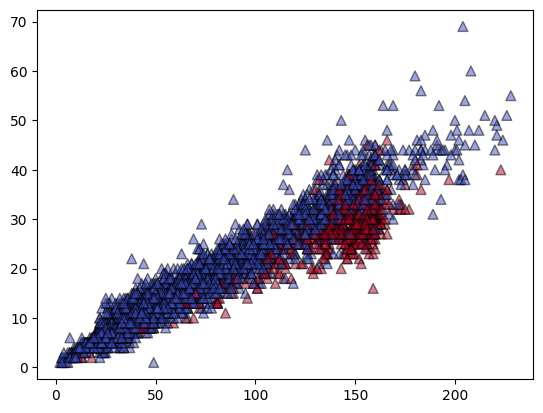

In [234]:
plt.scatter(data["num_characters"],data["num_words"],marker="^",c=data["target"],alpha=0.5,cmap="coolwarm",edgecolor="black",s=50)
plt.show()

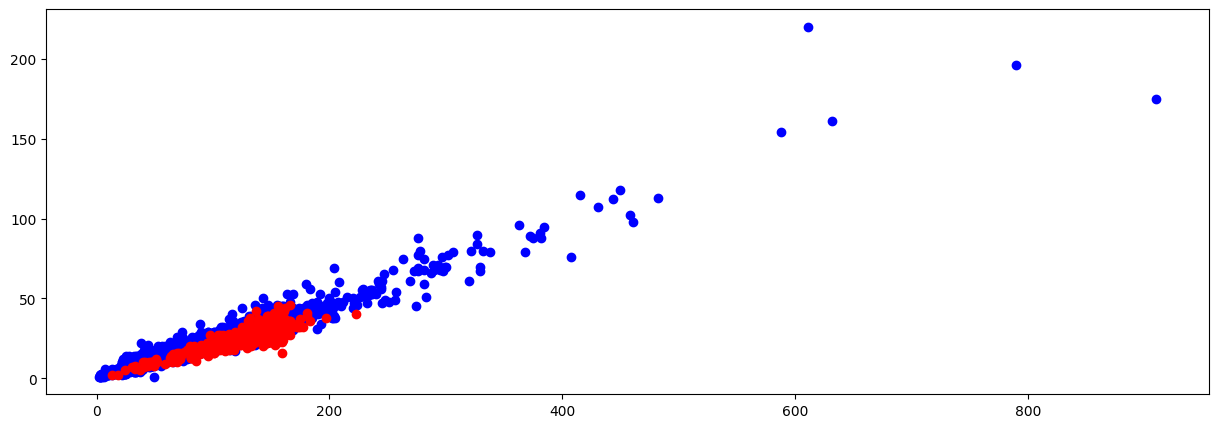

In [188]:
plt.figure(figsize=(15,5))
plt.scatter(data[data["target"]==0]["num_characters"],data[data["target"]==0]["num_words"],color="blue")
plt.scatter(data[data["target"]==1]["num_characters"],data[data["target"]==1]["num_words"],color="red")   
plt.show()  

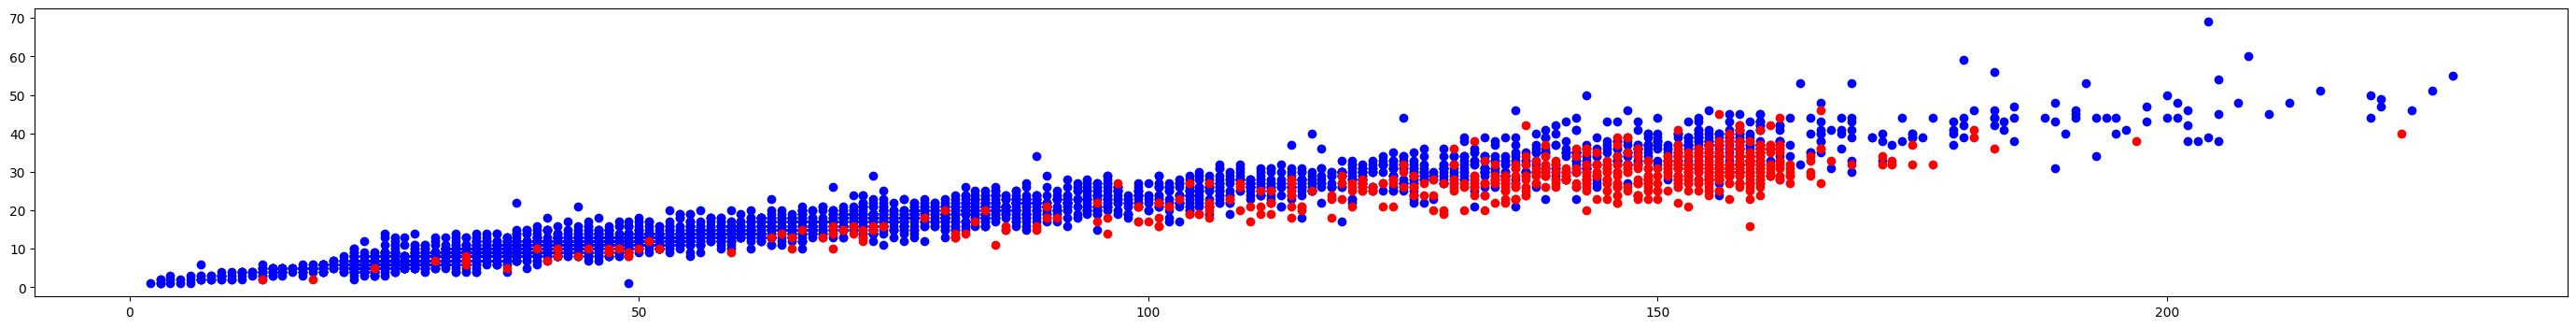

In [213]:
Q1=data["num_characters"].quantile(0.25)
Q3=data["num_characters"].quantile(0.75)
IQR=Q3-Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
data[data["num_characters"]>upper]
data[data["num_characters"]<lower]
data=data[(data["num_characters"]<upper) & (data["num_characters"]>lower)]
data.shape
# data.reset_index(inplace=True)  
plt.figure(figsize=(35,4))  
plt.scatter(data[data["target"]==0]["num_characters"],data[data["target"]==0]["num_words"],color="blue")
plt.scatter(data[data["target"]==1]["num_characters"],data[data["target"]==1]["num_words"],color="red")
plt.show()

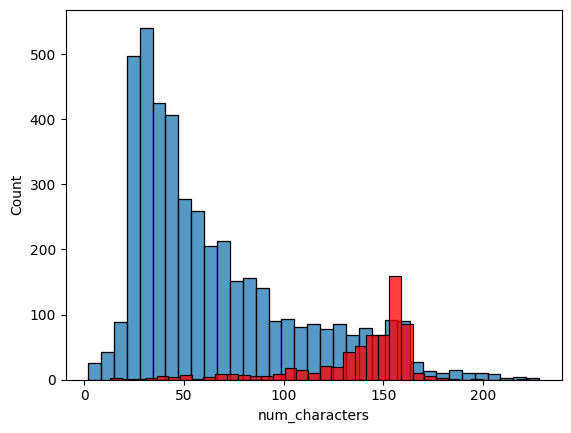

In [236]:
sns.histplot(data[data["target"] == 0]["num_characters"])
sns.histplot(data[data["target"] == 1]["num_characters"] , color = "red")       
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=6677)
y_pred4 = bnb.predict(x_test)   # create vectorizer
tfidf.fit_transform(data["text"]).toarray()    # fit on training text
print(accuracy_score(y_test,y_pred4)*100)   
print(confusion_matrix(y_test,y_pred4))
print(precision_score(y_test,y_pred4)*100)

96.61508704061895
[[885   4]
 [ 31 114]]
96.61016949152543


In [215]:
pickle.dump(tfidf,open("vectorizer.pkl","wb"))
pickle.dump(bnb,open("model.pkl","wb"))

In [237]:
data

,level_0,index,target,text,num_characters,num_words,num_sentences,transfrom_text
0,0,0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,1,1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,3,3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,4,4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...,...,...
5090,5098,5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5091,5099,5568,0,Will �_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5092,5100,5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5093,5101,5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...
